In [1]:
# ============================================================================
# PHASE 1 FEATURE ENGINEERING - Derived Features (Safe & Fast)
# ============================================================================

# Purpose: Create difference features that don't require historical aggregation
# These are "point-in-time" features with no data leakage risk

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


print("✓ Libraries imported successfully!")

# ============================================================================
# STEP 1: Load Preprocessed Data with Player Context
# ============================================================================

# Load the dataset that includes player IDs and names
df = pd.read_csv('../data/processed/matches_final_with_player_context.csv')

print(f"✓ Data loaded successfully!")
print(f"Shape: {df.shape}")
print(f"\nThe columns are:")
print(df.columns.tolist())
print(f"\nDataset info:")


df.info()



✓ Libraries imported successfully!
✓ Data loaded successfully!
Shape: (161807, 87)

The columns are:
['player1_id', 'player1_name', 'player1_rank', 'player1_rank_imputed', 'player1_ht', 'player1_age', 'player2_id', 'player2_name', 'player2_rank', 'player2_rank_imputed', 'player2_ht', 'player2_age', 'player1_won', 'draw_size', 'tourney_date', 'best_of', 'Qualifying_match', 'player1_hand_L', 'player1_hand_R', 'player1_hand_U', 'player2_hand_L', 'player2_hand_R', 'player2_hand_U', 'player1_entry_2) A', 'player1_entry_3)', 'player1_entry_5) A', 'player1_entry_6)', 'player1_entry_6) A', 'player1_entry_8)', 'player1_entry_A', 'player1_entry_AL', 'player1_entry_ALT', 'player1_entry_Alt', 'player1_entry_Direct', 'player1_entry_I', 'player1_entry_ITF', 'player1_entry_J', 'player1_entry_LL', 'player1_entry_P', 'player1_entry_PR', 'player1_entry_Q', 'player1_entry_S', 'player1_entry_SE', 'player1_entry_UP', 'player1_entry_W', 'player1_entry_WC', 'player2_entry_2) A', 'player2_entry_3)', 'player2_

## Simple Feature engineering ( Age / Height / Rank difference )


CREATING DERIVED FEATURES

✓ Created 'rank_difference'
   Range: -2256 to 2254
   Mean: 0.62
   Interpretation: Negative = Player1 better ranked

✓ Created 'age_difference'
   Range: -30.70 to 27.40
   Mean: -0.03
   Interpretation: Positive = Player1 older

✓ Created 'height_difference'
   Range: -200 to 190
   Mean: -0.01
   Interpretation: Positive = Player1 taller

✓ Total new features created: 3
✓ New dataset shape: (161807, 90)


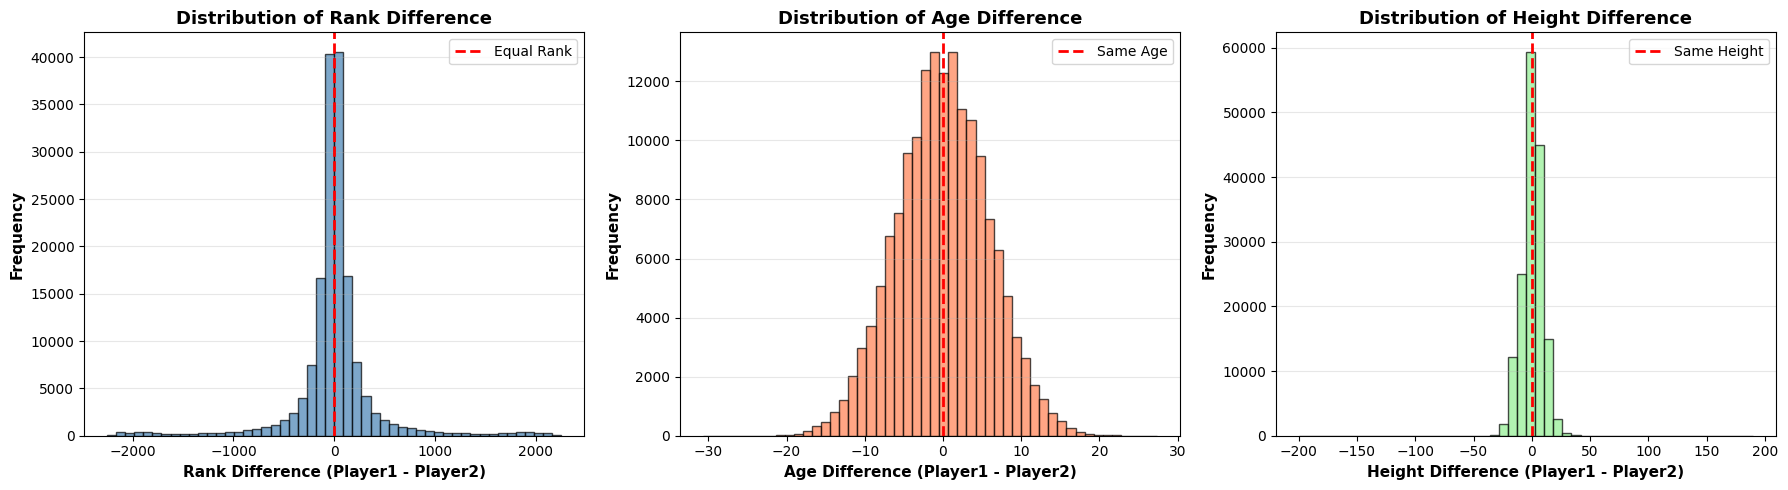


📊 Key Observations:
   • Rank Difference: Most matches have players with similar ranks (centered near 0)
   • Age Difference: Most players are similar in age (centered near 0)
   • Height Difference: Most players have similar heights (centered near 0)

FEATURE CORRELATION WITH TARGET (player1_won)

rank_difference     : -0.2730
   → MODERATE correlation

age_difference      : +0.0298
   → WEAK correlation

height_difference   : +0.0378
   → WEAK correlation


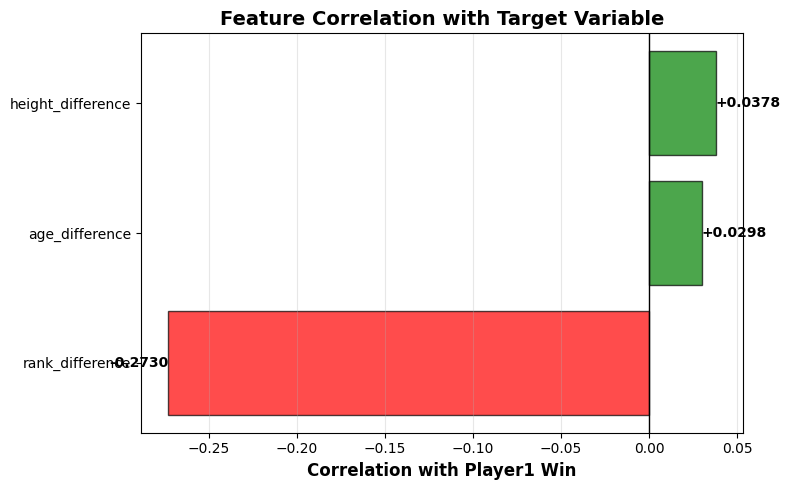


INTERPRETATION:
• Negative rank_difference correlation = Lower rank number (better player) → more likely to win
• This makes sense! The better-ranked player (lower number) should win more often
• Age and height differences have weaker correlations


In [2]:
# ============================================================================
# STEP 2: Create Derived Features (Difference Features)
# ============================================================================

print("\n" + "="*70)
print("CREATING DERIVED FEATURES")
print("="*70)

# 1. RANK DIFFERENCE
# Negative value = Player1 is higher ranked (lower rank number = better)
# Positive value = Player2 is higher ranked
df['rank_difference'] = df['player1_rank'] - df['player2_rank']

print(f"\n✓ Created 'rank_difference'")
print(f"   Range: {df['rank_difference'].min():.0f} to {df['rank_difference'].max():.0f}")
print(f"   Mean: {df['rank_difference'].mean():.2f}")
print(f"   Interpretation: Negative = Player1 better ranked")

# 2. AGE DIFFERENCE
# Positive value = Player1 is older
# Negative value = Player2 is older
df['age_difference'] = df['player1_age'] - df['player2_age']

print(f"\n✓ Created 'age_difference'")
print(f"   Range: {df['age_difference'].min():.2f} to {df['age_difference'].max():.2f}")
print(f"   Mean: {df['age_difference'].mean():.2f}")
print(f"   Interpretation: Positive = Player1 older")

# 3. HEIGHT DIFFERENCE
# Positive value = Player1 is taller
# Negative value = Player2 is taller
df['height_difference'] = df['player1_ht'] - df['player2_ht']

print(f"\n✓ Created 'height_difference'")
print(f"   Range: {df['height_difference'].min():.0f} to {df['height_difference'].max():.0f}")
print(f"   Mean: {df['height_difference'].mean():.2f}")
print(f"   Interpretation: Positive = Player1 taller")

print("\n" + "="*70)
print(f"✓ Total new features created: 3")
print(f"✓ New dataset shape: {df.shape}")
print("="*70)

# ============================================================================
# STEP 3: Visualize New Features and Their Relationship with Target
# ============================================================================

# Create a figure with 3 subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Rank Difference Distribution
axes[0].hist(df['rank_difference'], bins=50, edgecolor='black', alpha=0.7, color='steelblue')
axes[0].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Equal Rank')
axes[0].set_xlabel('Rank Difference (Player1 - Player2)', fontsize=11, fontweight='bold')
axes[0].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[0].set_title('Distribution of Rank Difference', fontsize=13, fontweight='bold')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# 2. Age Difference Distribution
axes[1].hist(df['age_difference'], bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Same Age')
axes[1].set_xlabel('Age Difference (Player1 - Player2)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[1].set_title('Distribution of Age Difference', fontsize=13, fontweight='bold')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# 3. Height Difference Distribution
axes[2].hist(df['height_difference'], bins=50, edgecolor='black', alpha=0.7, color='lightgreen')
axes[2].axvline(x=0, color='red', linestyle='--', linewidth=2, label='Same Height')
axes[2].set_xlabel('Height Difference (Player1 - Player2)', fontsize=11, fontweight='bold')
axes[2].set_ylabel('Frequency', fontsize=11, fontweight='bold')
axes[2].set_title('Distribution of Height Difference', fontsize=13, fontweight='bold')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("\n📊 Key Observations:")
print(f"   • Rank Difference: Most matches have players with similar ranks (centered near 0)")
print(f"   • Age Difference: Most players are similar in age (centered near 0)")
print(f"   • Height Difference: Most players have similar heights (centered near 0)")

# ============================================================================
# STEP 4: Analyze Feature Correlation with Target Variable
# ============================================================================

print("\n" + "="*70)
print("FEATURE CORRELATION WITH TARGET (player1_won)")
print("="*70)

# Calculate correlations
correlations = {
    'rank_difference': df['rank_difference'].corr(df['player1_won']),
    'age_difference': df['age_difference'].corr(df['player1_won']),
    'height_difference': df['height_difference'].corr(df['player1_won'])
}

for feature, corr in correlations.items():
    print(f"\n{feature:20s}: {corr:+.4f}")
    if abs(corr) > 0.3:
        print(f"   → STRONG correlation")
    elif abs(corr) > 0.1:
        print(f"   → MODERATE correlation")
    else:
        print(f"   → WEAK correlation")

# Visualize correlation
fig, ax = plt.subplots(figsize=(8, 5))
features = list(correlations.keys())
values = list(correlations.values())
colors = ['red' if v < 0 else 'green' for v in values]

bars = ax.barh(features, values, color=colors, alpha=0.7, edgecolor='black')
ax.axvline(x=0, color='black', linestyle='-', linewidth=1)
ax.set_xlabel('Correlation with Player1 Win', fontsize=12, fontweight='bold')
ax.set_title('Feature Correlation with Target Variable', fontsize=14, fontweight='bold')
ax.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    ax.text(width, bar.get_y() + bar.get_height()/2, 
            f'{width:+.4f}', 
            ha='left' if width > 0 else 'right',
            va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INTERPRETATION:")
print("="*70)
print("• Negative rank_difference correlation = Lower rank number (better player) → more likely to win")
print("• This makes sense! The better-ranked player (lower number) should win more often")
print("• Age and height differences have weaker correlations")
print("="*70)

## Further Feature engineering - Time aware 

* Surface specific win loss ratio ( Each player ? ) ✅
* Head to head ✅
* Total wins to Total loss each player ✅
* Recent Form ( Last 20 matches ) [ May be also do last 10 for per surface ]✅
    * One very interesting thing to try could be Last N Months which would capture true recency 
* Total Games played in ATP matches ✅
* Years Since last played  ??????
* Total matches played in the past 2-3 months ( or like win rate in the past 2-3 months )

--------

* #### One slight issue with this is that the inital matches will not have enough of a player history to correctly predict the initial matches  - 
    * one potential solution is that I import more matches from before 2013 and then use those to enrich our features but don't use them during training or modeling 

## 1. Career stats ( Easiest to do ) ( Wasn't as easy as it looked :o )


#### APPROACH EXPLANATION:

We need to track each player's career stats BEFORE each match.

*  NAIVE APPROACH (SLOWER But simplier and uses Hash table ):


* VECTORIZED APPROACH (FAST - 10 seconds):
  1. Create a "long format" where each match becomes 2 rows (one per player)
  2. Use groupby + cumsum to calculate running totals
  3. Shift by 1 to get stats from BEFORE current match
  4. Merge back to original format
-----------------------------------------------------------------------------

# A. Hash Table Approach 

* A. Hash table keyed by player_id: Stores running totals like {matches, wins} for each player.
* B. For each row (match):
Read both players’ current totals from the hash table to populate the “before” features.
Then increment that exact player’s totals in the hash table (matches +1, wins + outcome) to reflect this match.

Notes : 
* Y*ou don’t need to store “last index seen”; the running totals are enough.
* Update happens after recording “before” stats to avoid leakage.
* Default to zeros for unseen players; use 0.5 win rate when matches == 0.
* Keep a stable chronological sort; for same-day ties, rely on deterministic row order.

In [3]:
# ============================================================================
# ALTERNATIVE: Hash Table Approach (Simple & Clear)
# ============================================================================

from collections import defaultdict

## making a copy for The vectorized approach
## df_vectorized = df.copy()


print("\n" + "="*70)
print("CREATING CAREER STATISTICS (HASH TABLE APPROACH)")
print("="*70)

# Initialize columns in dataframe
df['player1_career_matches'] = 0
df['player1_career_wins'] = 0
df['player1_career_win_rate'] = 0.5

df['player2_career_matches'] = 0
df['player2_career_wins'] = 0
df['player2_career_win_rate'] = 0.5

# Hash table to store each player's career stats
# This is a nested dictionary where the key is the player_id and the value is a nested dictionary with matches and wins
# So first access outer key i.e player id and then access the inner dictionary with matches and wins
# so to get a certain players stats we do player_stats[player_id]['matches'] and player_stats[player_id]['wins']
player_stats = defaultdict(lambda: {'matches': 0, 'wins': 0})

# Iterate through matches (already sorted by date)
num_matches = len(df)
for i in range(num_matches):
    # Get match info
    p1_id = df.loc[i, 'player1_id']
    p2_id = df.loc[i, 'player2_id']
    p1_won = df.loc[i, 'player1_won']
    
    # Get stats BEFORE this match
    # Now if player ID isn't in the hash table it will set the default value to 0 for both matches and wins
    p1_stats = player_stats[p1_id]
    p2_stats = player_stats[p2_id]
    
    # Store "before" stats for player 1
    df.loc[i, 'player1_career_matches'] = p1_stats['matches']
    df.loc[i, 'player1_career_wins'] = p1_stats['wins']
    df.loc[i, 'player1_career_win_rate'] = (p1_stats['wins'] / p1_stats['matches']) if p1_stats['matches'] > 0 else 0.5
    
    # Store "before" stats for player 2
    df.loc[i, 'player2_career_matches'] = p2_stats['matches']
    df.loc[i, 'player2_career_wins'] = p2_stats['wins']
    df.loc[i, 'player2_career_win_rate'] = (p2_stats['wins'] / p2_stats['matches']) if p2_stats['matches'] > 0 else 0.5
    
    # Update hash table AFTER recording (to avoid data leakage)
    player_stats[p1_id]['matches'] += 1
    player_stats[p1_id]['wins'] += p1_won
    
    player_stats[p2_id]['matches'] += 1
    player_stats[p2_id]['wins'] += (1 - p1_won)
    
    # Progress indicator (optional - shows you it's working!)
    if (i + 1) % 10000 == 0:
        print(f"  Processed {i+1:,} / {num_matches:,} matches...")

# Create difference feature
df['career_win_rate_diff'] = df['player1_career_win_rate'] - df['player2_career_win_rate']

print(f"\n✓ Career stats calculated for {len(player_stats)} unique players")
print(f"✓ Processed {num_matches:,} matches")
print("="*70)


CREATING CAREER STATISTICS (HASH TABLE APPROACH)
  Processed 10,000 / 161,807 matches...
  Processed 20,000 / 161,807 matches...
  Processed 30,000 / 161,807 matches...
  Processed 40,000 / 161,807 matches...
  Processed 50,000 / 161,807 matches...
  Processed 60,000 / 161,807 matches...
  Processed 70,000 / 161,807 matches...
  Processed 80,000 / 161,807 matches...
  Processed 90,000 / 161,807 matches...
  Processed 100,000 / 161,807 matches...
  Processed 110,000 / 161,807 matches...
  Processed 120,000 / 161,807 matches...
  Processed 130,000 / 161,807 matches...
  Processed 140,000 / 161,807 matches...
  Processed 150,000 / 161,807 matches...
  Processed 160,000 / 161,807 matches...

✓ Career stats calculated for 5311 unique players
✓ Processed 161,807 matches


In [4]:
# ============================================================================
# VALIDATION: Test Hash Table Method
# ============================================================================

print("\n" + "="*70)
print("🔍 VALIDATING HASH TABLE METHOD")
print("="*70)

# Test 1: Pick a specific player and trace their history manually
test_player_id = 104594  # Matosevic

print(f"\n📋 Tracing player {test_player_id} match history:")
print("-"*70)

# Get all matches where this player appears (as player1 OR player2)
player_matches = df[
    (df['player1_id'] == test_player_id) | 
    (df['player2_id'] == test_player_id)
].copy()

# Add a column to show their role
player_matches['role'] = player_matches.apply(
    lambda row: 'player1' if row['player1_id'] == test_player_id else 'player2', 
    axis=1
)

# Add a column to show if they won
player_matches['won'] = player_matches.apply(
    lambda row: row['player1_won'] if row['player1_id'] == test_player_id else (1 - row['player1_won']),
    axis=1
)

# Show first 10 matches
cols_to_show = ['tourney_date', 'role', 'won', 'player1_career_matches', 
                'player1_career_wins', 'player1_career_win_rate',
                'player2_career_matches', 'player2_career_wins', 'player2_career_win_rate']

print(player_matches[cols_to_show].head(10))

print("\n🧮 Manual verification:")
print("-"*70)

# Manually calculate what the stats SHOULD be
cumulative_matches = 0
cumulative_wins = 0

for idx, row in player_matches.head(10).iterrows():
    # What the stats should be BEFORE this match
    expected_matches = cumulative_matches
    expected_wins = cumulative_wins
    expected_rate = (expected_wins / expected_matches) if expected_matches > 0 else 0.5
    
    # What the hash table calculated
    if row['role'] == 'player1':
        actual_matches = row['player1_career_matches']
        actual_wins = row['player1_career_wins']
        actual_rate = row['player1_career_win_rate']
    else:
        actual_matches = row['player2_career_matches']
        actual_wins = row['player2_career_wins']
        actual_rate = row['player2_career_win_rate']
    
    # Compare
    match_icon = "✅" if actual_matches == expected_matches else "❌"
    wins_icon = "✅" if actual_wins == expected_wins else "❌"
    rate_icon = "✅" if abs(actual_rate - expected_rate) < 0.001 else "❌"
    
    print(f"Match {idx} ({row['role']}): "
          f"Matches {match_icon} {int(actual_matches)} vs {expected_matches}, "
          f"Wins {wins_icon} {int(actual_wins)} vs {expected_wins}, "
          f"Rate {rate_icon} {actual_rate:.3f} vs {expected_rate:.3f}")
    
    # Update cumulative for next iteration
    cumulative_matches += 1
    cumulative_wins += row['won']

print("="*70)

df.info()


🔍 VALIDATING HASH TABLE METHOD

📋 Tracing player 104594 match history:
----------------------------------------------------------------------
      tourney_date     role  won  player1_career_matches  player1_career_wins  \
127       20100111  player2    0                       2                    1   
163       20100118  player2    0                       3                    1   
781       20100311  player1    1                       2                    0   
813       20100311  player1    0                       3                    1   
3028      20110102  player2    0                      66                   48   
3173      20110117  player2    0                      14                    9   
3585      20110221  player1    0                       6                    1   
3772      20110310  player2    0                      36                   20   
4654      20110620  player2    0                      86                   49   
4808      20110708  player2    0               

# B. Vectorized approach [Shit show -- > Has bugs ]

 Step 1 
* Sorting by date 
* Coverting to Long format


##### Step 2: Calculate the cumulative stats using grouby and cumsum
* Using Cumcount and Cumsum to get total matches and total wins 
* using shift(1) 
* Get cumulative career win rate for each tourney date 
* For first matches replace NAN values of wins and matches before to 0 
* For win rate set it to .5 ( But the model will impute the fact that if they have total matches before = 0 to not trust this )
    * again this can be fixed by feature engineering based off of previous year matches or only training from say dates of 2018 and above


#####  Step 3: Covert back into wide format so each match is represetned by 1 row 


In [5]:

# # STEP 1: Career Win Rate (FULLY VECTORIZED ⚡)
# # ============================================================================

# print("\n" + "="*70)
# print("STEP 1: CREATING CAREER STATISTICS (VECTORIZED)")
# print("="*70)

# # -----------------------------------------------------------------------------
# # CRITICAL: Sort by date to ensure chronological order
# # -----------------------------------------------------------------------------

# # Use the Df_vectorized for this 

# # df_vectorized = df_vectorized.sort_values(by='tourney_date', kind= 'stable').reset_index(drop=True) 
# # doing stable ensures that the order of the same values of tourney_date is maintained so for ties it will be in the order of the original df

# print(f"✓ Data sorted by tourney_date")
# print(f"   Date range: {df_vectorized['tourney_date'].min()} to {df_vectorized['tourney_date'].max()}")

# # -----------------------------------------------------------------------------

# # Step 1a: Create "long format" - Each match becomes 2 rows

# print("\n Creating the long format for Vectorized calculations")
# # Why do we use Long format ? because when we do this such that each match becomes 2 rows (one per player)
# # We can cleanly do groupby + cumsum to calculate running totals but when we do it in the wide format 
# # Because essentially we would be doing a groupby on player 1 and player 2 and then making sure their IDs match
# # up and use that combine to get the running totals [ Not to mention the fact that it has to be in a chronological order ]

# # Can we do it in the wide format ? 
# # Tehnically yes but there would be two group by and then merge in chronological order and it would be a mess 

# # For player 1
# player1_rows = df_vectorized[['tourney_date', 'player1_id', 'player1_won']].copy()
# player1_rows.columns = ['tourney_date', 'player_id', 'won']
# player1_rows['role'] = 'player1'  # ← CRITICAL!
# player1_rows['match_id'] = df_vectorized.index  # ← CRITICAL!

# # For player 2
# player2_rows = df_vectorized[['tourney_date', 'player2_id', 'player1_won']].copy()
# player2_rows.columns = ['tourney_date', 'player_id', 'won']
# player2_rows['won'] = 1 - player2_rows['won'] # Essentially we are flipping the won column for player 2 because if player 1 won then player 2 lost and vice versa
# player2_rows['role'] = 'player2'  # ← CRITICAL!
# player2_rows['match_id'] = df_vectorized.index  # ← CRITICAL!

# # Combine
# all_matches_long = pd.concat([player1_rows, player2_rows], ignore_index=True)
# # Ignore index because if we combine results and keep original index we will have duplicates for the index
# # This essentially tells pandas to create a new index from 0 - N-1 
# # print ( long_df.loc[2])

# all_matches_long = all_matches_long.sort_values(['player_id', 'tourney_date', 'match_id']).reset_index(drop=True) # messes up the order of the df
# # When we sort values by two , it will first sort by player_id and then by tourney_date for each player_id
# # Reason for sorting by the two columns is because of the shift(1) funciton we'll be using later so its the same playeres 
# # Reset_index - converts the current index into a column and then creates a new index from 0 - N-1
# # Drop = True - because we don't want to keep the old index column

# print(f"✓ Long format created: {len(all_matches_long):,} player-match records")
# print(f"   (Each of {len(df_vectorized):,} matches becomes 2 rows)")


# # Step 1b: Calculate CUMULATIVE stats using groupby + cumsum (VECTORIZED!)

# # Group the players and get the comulatative sum of wins and total matches for each player based on the tourney_date 
# all_matches_long['career_total_matches'] = all_matches_long.groupby('player_id').cumcount() + 1 # +1 because we want to start from 1 and cumcount starts from 0
# all_matches_long['career_total_wins'] = all_matches_long.groupby('player_id')['won'].cumsum() # no +1 because we are summing the wins and if its 0 then it will be 0


# print(all_matches_long.head())


# # Now we shift the values by 1 ( down words because technically the first match of each player will = total matches = 0 )
# # Because we want to get the stats from before the current match 

# # Will apply shift 1 to the groupby values so we shift within each group of player_id so another players values don't get used
# all_matches_long['career_total_matches_before'] = all_matches_long.groupby('player_id')['career_total_matches'].shift(1)
# all_matches_long['career_total_wins_before'] = all_matches_long.groupby('player_id')['career_total_wins'].shift(1)

# # Now we can calculate the win rate before the match 
# # For NaN values i.e the first match for each player we will also get NAN as win rate 
# all_matches_long['career_win_rate_before'] = all_matches_long['career_total_wins_before'] / all_matches_long['career_total_matches_before']



# # Fill NaN for players' first match (no history yet)
# # And for win rate set it to .5 ( But the model will impute the fact that if they have total matches before = 0 to not trust this )
# all_matches_long['career_win_rate_before'] = all_matches_long['career_win_rate_before'].fillna(0.5)
# all_matches_long['career_total_matches_before'] = all_matches_long['career_total_matches_before'].fillna(0)
# all_matches_long['career_total_wins_before'] = all_matches_long['career_total_wins_before'].fillna(0)

# #Step 3: Merge back to the original df

# # Now to merge back to the original df first filter by role 
# player1_stats = all_matches_long[all_matches_long['role'] == 'player1']
# player2_stats = all_matches_long[all_matches_long['role'] == 'player2']

# # Add match_id to the original DF
# df_vectorized['match_id'] = df_vectorized.index

# # Prepare and merge player1 stats
# player1_merge = player1_stats[[
#     'match_id', 
#     'career_total_matches_before', 
#     'career_total_wins_before', 
#     'career_win_rate_before'
# ]].rename(columns={
#     'career_total_matches_before': 'player1_career_matches',
#     'career_total_wins_before': 'player1_career_wins',
#     'career_win_rate_before': 'player1_career_win_rate'
# })

# # Left means keep all the columns from the left data frame and add matching data from the right data frame i.e player1_merge

# df_vectorized = df_vectorized.merge(player1_merge, on='match_id', how='left')

# # Prepare and merge player2 stats
# player2_merge = player2_stats[[
#     'match_id', 
#     'career_total_matches_before', 
#     'career_total_wins_before', 
#     'career_win_rate_before'
# ]].rename(columns={
#     'career_total_matches_before': 'player2_career_matches',
#     'career_total_wins_before': 'player2_career_wins',
#     'career_win_rate_before': 'player2_career_win_rate'
# })

# df_vectorized = df_vectorized.merge(player2_merge, on='match_id', how='left')


# # Drop the match_id column if you don't need it
# df_vectorized = df_vectorized.drop(columns=['match_id'])

# # Create difference feature
# df_vectorized['career_win_rate_diff'] = df_vectorized['player1_career_win_rate'] - df_vectorized['player2_career_win_rate']


# print("Finished Vectorized Career Stats")
# print(df_vectorized.info())
# print("✅ Career stats merged successfully!")


# # ============================================================================
# # VALIDATION: Compare Hash Table vs Vectorized Results
# # ============================================================================

# print("\n" + "="*70)
# print("🔍 VALIDATION: Comparing Hash Table vs Vectorized Methods")
# print("="*70)

# # Columns to compare
# columns_to_check = [
#     'player1_career_matches', 'player1_career_wins', 'player1_career_win_rate',
#     'player2_career_matches', 'player2_career_wins', 'player2_career_win_rate',
#     'career_win_rate_diff'
# ]

# # First, check if both dataframes have the same shape
# print(f"\n📊 Shape comparison:")
# print(f"   Hash Table (df):        {df.shape}")
# print(f"   Vectorized (df_vectorized): {df_vectorized.shape}")

# # Check if they have the same number of rows
# if len(df) != len(df_vectorized):
#     print("\n❌ ERROR: DataFrames have different number of rows!")
# else:
#     print(f"   ✓ Both have {len(df):,} rows")

# # Compare each column
# print(f"\n🔍 Comparing {len(columns_to_check)} columns...")
# all_match = True
# mismatches = []

# for col in columns_to_check:
#     # Check if column exists in both
#     if col not in df.columns:
#         print(f"  ❌ {col}: Missing in df (hash table)")
#         all_match = False
#         continue
#     if col not in df_vectorized.columns:
#         print(f"  ❌ {col}: Missing in df_vectorized")
#         all_match = False
#         continue
    
#     # For float columns, use approximate comparison (handle floating point precision)
#     if col.endswith('_rate') or col.endswith('_diff'):
#         match = np.allclose(df[col], df_vectorized[col], rtol=1e-9, atol=1e-9, equal_nan=True)
#         if match:
#             max_diff = np.abs(df[col] - df_vectorized[col]).max()
#             print(f"  ✅ {col}: MATCH (max diff: {max_diff:.2e})")
#         else:
#             print(f"  ❌ {col}: MISMATCH!")
#             all_match = False
#             mismatches.append(col)
#     else:
#         # For integer columns, exact comparison
#         match = (df[col] == df_vectorized[col]).all()
#         if match:
#             print(f"  ✅ {col}: MATCH (exact)")
#         else:
#             print(f"  ❌ {col}: MISMATCH!")
#             all_match = False
#             mismatches.append(col)

# # Final verdict
# print("\n" + "="*70)
# if all_match:
#     print("✅ SUCCESS: Both methods produce IDENTICAL results!")
#     print("   Hash Table and Vectorized approaches are equivalent.")
# else:
#     print("❌ FAILURE: Methods produce DIFFERENT results!")
#     print(f"   {len(mismatches)} column(s) don't match: {mismatches}")
# print("="*70)

# # Show detailed comparison for first 10 rows
# print("\n📋 Sample comparison (first 10 rows):")
# comparison_cols = ['player1_id', 'player2_id', 'player1_career_matches', 
#                    'player1_career_wins', 'player1_career_win_rate']

# print("\n--- Hash Table Method (df) ---")
# print(df[comparison_cols].head(10))

# print("\n--- Vectorized Method (df_vectorized) ---")
# print(df_vectorized[comparison_cols].head(10))

# # If there are mismatches, show where they occur
# if not all_match and len(mismatches) > 0:
#     print("\n🔍 Investigating mismatches...")
#     for col in mismatches[:3]:  # Show first 3 mismatched columns
#         print(f"\n--- Mismatch in {col} ---")
#         diff_mask = df[col] != df_vectorized[col]
#         n_diff = diff_mask.sum()
#         print(f"Number of differences: {n_diff}")
#         if n_diff > 0:
#             print(f"\nFirst 5 mismatched rows:")
#             print(f"Hash Table values:")
#             print(df[diff_mask][[col, 'player1_id', 'player2_id']].head())
#             print(f"\nVectorized values:")
#             print(df_vectorized[diff_mask][[col, 'player1_id', 'player2_id']].head())

# # Statistics comparison
# print("\n📊 Statistical Summary Comparison:")
# for col in columns_to_check:
#     if col in df.columns and col in df_vectorized.columns:
#         print(f"\n{col}:")
#         print(f"  Hash Table - Mean: {df[col].mean():.6f}, Std: {df[col].std():.6f}")
#         print(f"  Vectorized - Mean: {df_vectorized[col].mean():.6f}, Std: {df_vectorized[col].std():.6f}")


## 2. Surface Specific Win loss ratio
### Added carpet as well now - Was missing


For match on date X:
  - Look at player's matches BEFORE date X
  - Count wins on this surface / total matches on this surface
  - player1_clay_win_rate, player1_grass_win_rate, player1_hard_win_rate
  - player2_clay_win_rate, player2_grass_win_rate, player2_hard_win_rate



* Implementation 

  * Use a triple nested Dictionary for our Surfaces stats 

  * so player_surface_Stats[playerid][type][matches]
  * print(player_surface_stats[101])                      # All surfaces for player 101
  * print(player_surface_stats[101]['Clay'])              # Clay stats for player 101
  * print(player_surface_stats[101]['Clay']['matches'])   # 5
  * print(player_surface_stats[101]['Clay']['wins'])      # 3

In [6]:
# ============================================================================
# STEP 2: Surface-Specific Win Rates
# ============================================================================

print("\n" + "="*70)
print("STEP 2: CREATING SURFACE-SPECIFIC WIN RATES")
print("="*70)

from collections import defaultdict


# Initialize columns for ALL 4 surfaces
for player in ['player1', 'player2']:
    for surface in ['clay', 'grass', 'hard', 'carpet']:
        df[f'{player}_{surface}_matches'] = 0
        df[f'{player}_{surface}_wins'] = 0
        df[f'{player}_{surface}_win_rate'] = 0.5

# Hash table: player_id -> {surface -> {'matches': int, 'wins': int}}
# Lambda is short hand for creating a small unnamed function that returns a dictionary with the given keys and values
# When lambda is used with defaultdict if a key doesn't exist it will create a default value for it
player_surface_stats = defaultdict(lambda: {
    'Clay':   {'matches': 0, 'wins': 0},
    'Grass':  {'matches': 0, 'wins': 0},
    'Hard':   {'matches': 0, 'wins': 0},
    'Carpet': {'matches': 0, 'wins': 0},
})

# Iterate through matches
num_matches = len(df)
for i in range(num_matches):
    # Get match info
    p1_id = df.loc[i, 'player1_id']
    p2_id = df.loc[i, 'player2_id']
    p1_won = df.loc[i, 'player1_won']
    
    # Determine surface from 4 one-hot dummies
    if df.loc[i, 'surface_Clay'] == 1:
        surface = 'Clay'
    elif df.loc[i, 'surface_Grass'] == 1:
        surface = 'Grass'
    elif df.loc[i, 'surface_Hard'] == 1:
        surface = 'Hard'
    else:
        # If none of the above, it must be Carpet
        surface = 'Carpet'
    
    # Get stats BEFORE this match
    # Or set it if this is the first time we are seeing this player 
    p1_surface_stats = player_surface_stats[p1_id][surface]
    p2_surface_stats = player_surface_stats[p2_id][surface]
    
    # Store "before" stats for player 1
    df.loc[i, f'player1_{surface.lower()}_matches'] = p1_surface_stats['matches']
    df.loc[i, f'player1_{surface.lower()}_wins'] = p1_surface_stats['wins']
    df.loc[i, f'player1_{surface.lower()}_win_rate'] = (
        p1_surface_stats['wins'] / p1_surface_stats['matches']
    ) if p1_surface_stats['matches'] > 0 else 0.5
    
    # Store "before" stats for player 2
    df.loc[i, f'player2_{surface.lower()}_matches'] = p2_surface_stats['matches']
    df.loc[i, f'player2_{surface.lower()}_wins'] = p2_surface_stats['wins']
    df.loc[i, f'player2_{surface.lower()}_win_rate'] = (
        p2_surface_stats['wins'] / p2_surface_stats['matches']
    ) if p2_surface_stats['matches'] > 0 else 0.5
    
    # Update hash table AFTER recording
    player_surface_stats[p1_id][surface]['matches'] += 1
    player_surface_stats[p1_id][surface]['wins'] += p1_won
    
    player_surface_stats[p2_id][surface]['matches'] += 1
    player_surface_stats[p2_id][surface]['wins'] += (1 - p1_won)
    
    # Progress indicator
    if (i + 1) % 10000 == 0:
        print(f"  Processed {i+1:,} / {num_matches:,} matches...")

# Create difference features
df['clay_win_rate_diff'] = df['player1_clay_win_rate'] - df['player2_clay_win_rate']
df['grass_win_rate_diff'] = df['player1_grass_win_rate'] - df['player2_grass_win_rate']
df['hard_win_rate_diff'] = df['player1_hard_win_rate'] - df['player2_hard_win_rate']
df['carpet_win_rate_diff'] = df['player1_carpet_win_rate'] - df['player2_carpet_win_rate']

print(f"\n✓ Surface-specific stats calculated")
print(f"✓ Processed {num_matches:,} matches")
print("="*70)




STEP 2: CREATING SURFACE-SPECIFIC WIN RATES
  Processed 10,000 / 161,807 matches...
  Processed 20,000 / 161,807 matches...
  Processed 30,000 / 161,807 matches...
  Processed 40,000 / 161,807 matches...
  Processed 50,000 / 161,807 matches...
  Processed 60,000 / 161,807 matches...
  Processed 70,000 / 161,807 matches...
  Processed 80,000 / 161,807 matches...
  Processed 90,000 / 161,807 matches...
  Processed 100,000 / 161,807 matches...
  Processed 110,000 / 161,807 matches...
  Processed 120,000 / 161,807 matches...
  Processed 130,000 / 161,807 matches...
  Processed 140,000 / 161,807 matches...
  Processed 150,000 / 161,807 matches...
  Processed 160,000 / 161,807 matches...

✓ Surface-specific stats calculated
✓ Processed 161,807 matches


# Plotting distribution of matches 

# ( Ephipheny - ofcourse they are mainly sparse because its one hot encoded and they will all add up to 100% :o lol)

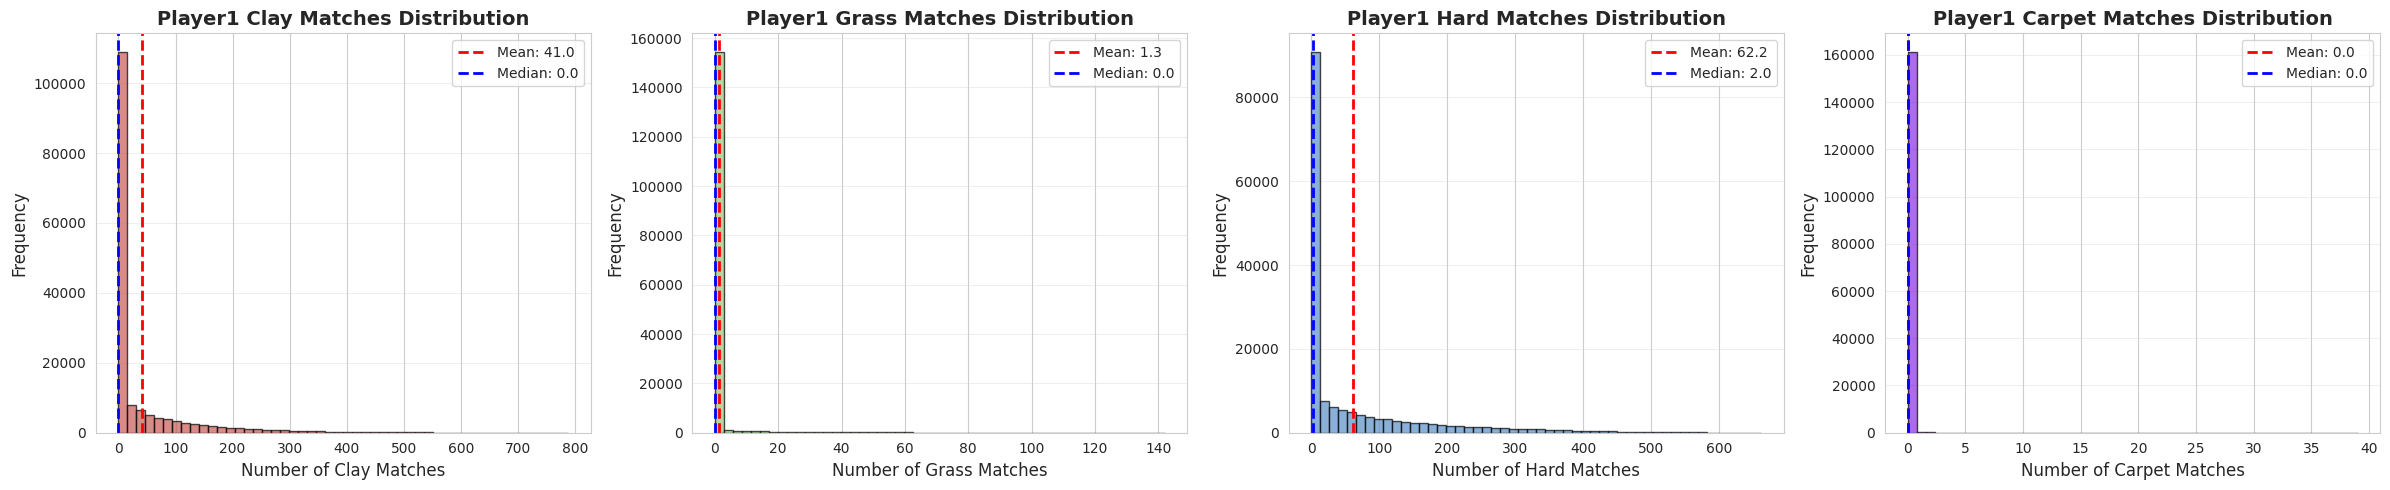


SURFACE MATCH DISTRIBUTION SUMMARY

CLAY Matches:
  Mean:   41.00
  Median: 0.00
  Std:    84.31
  Min:    0
  Max:    788
  % with 0 matches: 59.9%

GRASS Matches:
  Mean:   1.25
  Median: 0.00
  Std:    7.47
  Min:    0
  Max:    142
  % with 0 matches: 94.8%

HARD Matches:
  Mean:   62.21
  Median: 2.00
  Std:    103.35
  Min:    0
  Max:    662
  % with 0 matches: 48.6%

CARPET Matches:
  Mean:   0.03
  Median: 0.00
  Std:    0.67
  Min:    0
  Max:    39
  % with 0 matches: 99.6%


In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_style("whitegrid")

# Create figure with 4 subplots
fig, axes = plt.subplots(1, 4, figsize=(24, 5))

# Plot 1: Clay matches distribution
axes[0].hist(df['player1_clay_matches'], bins=50, color='#C85A54', edgecolor='black', alpha=0.7)
axes[0].set_title('Player1 Clay Matches Distribution', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Number of Clay Matches', fontsize=12)
axes[0].set_ylabel('Frequency', fontsize=12)
axes[0].axvline(df['player1_clay_matches'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["player1_clay_matches"].mean():.1f}')
axes[0].axvline(df['player1_clay_matches'].median(), color='blue', linestyle='--', linewidth=2,
                label=f'Median: {df["player1_clay_matches"].median():.1f}')
axes[0].legend()
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Grass matches distribution
axes[1].hist(df['player1_grass_matches'], bins=50, color='#90C878', edgecolor='black', alpha=0.7)
axes[1].set_title('Player1 Grass Matches Distribution', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Number of Grass Matches', fontsize=12)
axes[1].set_ylabel('Frequency', fontsize=12)
axes[1].axvline(df['player1_grass_matches'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["player1_grass_matches"].mean():.1f}')
axes[1].axvline(df['player1_grass_matches'].median(), color='blue', linestyle='--', linewidth=2,
                label=f'Median: {df["player1_grass_matches"].median():.1f}')
axes[1].legend()
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: Hard matches distribution
axes[2].hist(df['player1_hard_matches'], bins=50, color='#5A8FC8', edgecolor='black', alpha=0.7)
axes[2].set_title('Player1 Hard Matches Distribution', fontsize=14, fontweight='bold')
axes[2].set_xlabel('Number of Hard Matches', fontsize=12)
axes[2].set_ylabel('Frequency', fontsize=12)
axes[2].axvline(df['player1_hard_matches'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["player1_hard_matches"].mean():.1f}')
axes[2].axvline(df['player1_hard_matches'].median(), color='blue', linestyle='--', linewidth=2,
                label=f'Median: {df["player1_hard_matches"].median():.1f}')
axes[2].legend()
axes[2].grid(axis='y', alpha=0.3)

# Plot 4: Carpet matches distribution
axes[3].hist(df['player1_carpet_matches'], bins=50, color='#8A2BE2', edgecolor='black', alpha=0.7)
axes[3].set_title('Player1 Carpet Matches Distribution', fontsize=14, fontweight='bold')
axes[3].set_xlabel('Number of Carpet Matches', fontsize=12)
axes[3].set_ylabel('Frequency', fontsize=12)
axes[3].axvline(df['player1_carpet_matches'].mean(), color='red', linestyle='--', linewidth=2,
                label=f'Mean: {df["player1_carpet_matches"].mean():.1f}')
axes[3].axvline(df['player1_carpet_matches'].median(), color='blue', linestyle='--', linewidth=2,
                label=f'Median: {df["player1_carpet_matches"].median():.1f}')
axes[3].legend()
axes[3].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

# Print summary statistics
print("\n" + "="*70)
print("SURFACE MATCH DISTRIBUTION SUMMARY")
print("="*70)

for surface in ['clay', 'grass', 'hard', 'carpet']:
    col = f'player1_{surface}_matches'
    print(f"\n{surface.upper()} Matches:")
    print(f"  Mean:   {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std:    {df[col].std():.2f}")
    print(f"  Min:    {df[col].min():.0f}")
    print(f"  Max:    {df[col].max():.0f}")
    print(f"  % with 0 matches: {(df[col] == 0).sum() / len(df) * 100:.1f}%")

# 3. Head to head 

* Things to note :  

   *  Row 10: player1=Federer(101), player2=Nadal(102)  → Federer wins 
   *  Row 50: player1=Nadal(102), player2=Federer(101)  → Nadal wins 
    *  These are the SAME rivalry, just with roles flipped! We need to track them together. So essentially if we use these ids as keys their order would mean different keys so we use a  **Canonical Key** which is basically a key with sorted player ids and the smaller one alwasy comes first

 


In [8]:
print("\n" + "="*70)
print("STEP 3: CREATING HEAD-TO-HEAD STATISTICS")
print("="*70)

# making a helper function to help get the canonical key 
def get_h2h_key(p1_id, p2_id):
    # The cool things about tuples is they can be used as keys in a dictionary and they are immutable
    # Player 1 id is smaller than player 2 id in this tuple
    return tuple(sorted((p1_id, p2_id)))


# Initialize columns
df['h2h_matches'] = 0
df['player1_h2h_wins'] = 0
df['player1_h2h_win_rate'] = 0.5
df['player2_h2h_wins'] = 0
df['player2_h2h_win_rate'] = 0.5

# Initialize a dictionary to store head-to-head stats
h2h_stats = defaultdict(lambda: {'matches': 0, 'smaller_id_wins': 0, 'larger_id_wins': 0})

# Interate through matches
num_matches = len(df)
for i in range(num_matches):
    # Get match info
    p1_id = df.loc[i, 'player1_id']
    p2_id = df.loc[i, 'player2_id']
    p1_won = df.loc[i, 'player1_won']


    # Get the canonical key
    h2h_key = get_h2h_key(p1_id, p2_id)
    smaller_id, larger_id = h2h_key
    
    # Get stats BEFORE this match
    h2h = h2h_stats[h2h_key]
    
    # Determine player1's H2H wins
    if p1_id == smaller_id:
        p1_h2h_wins = h2h['smaller_id_wins']
    else:
        p1_h2h_wins = h2h['larger_id_wins']
    
    if p2_id == smaller_id:
        p2_h2h_wins = h2h['smaller_id_wins']
    else:
        p2_h2h_wins = h2h['larger_id_wins']
    
    
    # Store "before" stats
    df.loc[i, 'h2h_matches'] = h2h['matches']
    df.loc[i, 'player1_h2h_wins'] = p1_h2h_wins
    df.loc[i, 'player2_h2h_wins'] = p2_h2h_wins
    
    # Calculate win rates
    if h2h['matches'] > 0:
        df.loc[i, 'player1_h2h_win_rate'] = p1_h2h_wins / h2h['matches']
        df.loc[i, 'player2_h2h_win_rate'] = p2_h2h_wins / h2h['matches']
    else:
        df.loc[i, 'player1_h2h_win_rate'] = 0.5
        df.loc[i, 'player2_h2h_win_rate'] = 0.5
    
    # Update hash table AFTER recording
    h2h['matches'] += 1
    if p1_won:
        if p1_id == smaller_id:
            h2h['smaller_id_wins'] += 1
        else:
            h2h['larger_id_wins'] += 1
    else:
        # Player2 won (THIS WAS MISSING!)
        if p2_id == smaller_id:
            h2h['smaller_id_wins'] += 1
        else:
            h2h['larger_id_wins'] += 1

    # Progress indicator
    if (i + 1) % 10000 == 0:
        print(f"  Processed {i+1:,} / {num_matches:,} matches...")

# Create difference feature
df['h2h_win_rate_diff'] = df['player1_h2h_win_rate'] - df['player2_h2h_win_rate']

print(f"\n✓ Head-to-head stats calculated")
print(f"✓ Processed {num_matches:,} matches")
print(f"✓ Tracked {len(h2h_stats):,} unique player rivalries")
print("="*70)


df.info()



STEP 3: CREATING HEAD-TO-HEAD STATISTICS
  Processed 10,000 / 161,807 matches...
  Processed 20,000 / 161,807 matches...
  Processed 30,000 / 161,807 matches...
  Processed 40,000 / 161,807 matches...
  Processed 50,000 / 161,807 matches...
  Processed 60,000 / 161,807 matches...
  Processed 70,000 / 161,807 matches...
  Processed 80,000 / 161,807 matches...
  Processed 90,000 / 161,807 matches...
  Processed 100,000 / 161,807 matches...
  Processed 110,000 / 161,807 matches...
  Processed 120,000 / 161,807 matches...
  Processed 130,000 / 161,807 matches...
  Processed 140,000 / 161,807 matches...
  Processed 150,000 / 161,807 matches...
  Processed 160,000 / 161,807 matches...

✓ Head-to-head stats calculated
✓ Processed 161,807 matches
✓ Tracked 111,675 unique player rivalries
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161807 entries, 0 to 161806
Columns: 131 entries, player1_id to h2h_win_rate_diff
dtypes: bool(70), float64(27), int64(32), object(2)
memory usage: 86.1+ MB


In [9]:
# ============================================================================
# HEAD-TO-HEAD ANALYSIS: View rivalry between two players
# ============================================================================

# Choose two players (you can change these IDs)
player_a_id = 103819  # Federer
player_b_id = 104745  # Nadal

# Get all matches between these two players
h2h_matches = df[
    ((df['player1_id'] == player_a_id) & (df['player2_id'] == player_b_id)) |
    ((df['player1_id'] == player_b_id) & (df['player2_id'] == player_a_id))
].copy()

print(f"\n{'='*70}")
print(f"HEAD-TO-HEAD: Player {player_a_id} vs Player {player_b_id}")
print(f"{'='*70}")
print(f"Total matches: {len(h2h_matches)}")

if len(h2h_matches) == 0:
    print("❌ These players have never faced each other!")
else:
    # Get player names
    player_a_name = h2h_matches.iloc[0]['player1_name'] if h2h_matches.iloc[0]['player1_id'] == player_a_id else h2h_matches.iloc[0]['player2_name']
    player_b_name = h2h_matches.iloc[0]['player2_name'] if h2h_matches.iloc[0]['player1_id'] == player_a_id else h2h_matches.iloc[0]['player1_name']
    
    print(f"{player_a_name} ({player_a_id}) vs {player_b_name} ({player_b_id})")
    
    # Add helpful columns
    h2h_matches['winner'] = h2h_matches.apply(
        lambda row: player_a_name if (
            (row['player1_id'] == player_a_id and row['player1_won'] == 1) or
            (row['player2_id'] == player_a_id and row['player1_won'] == 0)
        ) else player_b_name,
        axis=1
    )
    
    # Determine who was player1 in each match
    h2h_matches['player_a_role'] = h2h_matches.apply(
        lambda row: 'P1' if row['player1_id'] == player_a_id else 'P2',
        axis=1
    )
    
    # Get surface
    h2h_matches['surface'] = h2h_matches.apply(
        lambda row: 'Clay' if row['surface_Clay'] else ('Grass' if row['surface_Grass'] else 'Hard'),
        axis=1
    )
    
    # Select columns to display
    cols_to_show = [
        'tourney_date',
        'surface',
        'player_a_role',
        'winner',
        'h2h_matches',
        'player1_h2h_wins',
        'player2_h2h_wins',
        'player1_h2h_win_rate',
        'player2_h2h_win_rate'
    ]
    
    # Display first 20 matches
    print(f"\nFirst 20 matches (chronological order):")
    print(f"{'─'*70}")
    print(h2h_matches[cols_to_show].head(20).to_string(index=False))
    
    # Overall summary
    print(f"\n{'='*70}")
    print(f"OVERALL SUMMARY:")
    print(f"{'─'*70}")
    
    # Count wins
    player_a_wins = (h2h_matches['winner'] == player_a_name).sum()
    player_b_wins = (h2h_matches['winner'] == player_b_name).sum()
    
    print(f"  Total matches: {len(h2h_matches)}")
    print(f"  {player_a_name} wins: {player_a_wins} ({player_a_wins/len(h2h_matches)*100:.1f}%)")
    print(f"  {player_b_name} wins: {player_b_wins} ({player_b_wins/len(h2h_matches)*100:.1f}%)")
    
    # Surface breakdown
    print(f"\n  Surface breakdown:")
    for surface in ['Clay', 'Grass', 'Hard']:
        surface_matches = h2h_matches[h2h_matches['surface'] == surface]
        if len(surface_matches) > 0:
            surface_a_wins = (surface_matches['winner'] == player_a_name).sum()
            print(f"    {surface}: {len(surface_matches)} matches, "
                  f"{player_a_name} {surface_a_wins}-{len(surface_matches)-surface_a_wins} {player_b_name}")
    
    print(f"{'='*70}")


    # For each match, calculate actual Federer vs Nadal record
h2h_matches['federer_wins_before'] = h2h_matches.apply(
    lambda row: row['player1_h2h_wins'] if row['player1_id'] == player_a_id else row['player2_h2h_wins'],
    axis=1
)
h2h_matches['nadal_wins_before'] = h2h_matches.apply(
    lambda row: row['player2_h2h_wins'] if row['player1_id'] == player_a_id else row['player1_h2h_wins'],
    axis=1
)

# Show this instead
cols_to_show = [
    'tourney_date',
    'surface',
    'player_a_role',
    'winner',
    'h2h_matches',
    'federer_wins_before',
    'nadal_wins_before'
]
print(h2h_matches[cols_to_show].head(20).to_string(index=False))


HEAD-TO-HEAD: Player 103819 vs Player 104745
Total matches: 21
Roger Federer (103819) vs Rafael Nadal (104745)

First 20 matches (chronological order):
──────────────────────────────────────────────────────────────────────
 tourney_date surface player_a_role        winner  h2h_matches  player1_h2h_wins  player2_h2h_wins  player1_h2h_win_rate  player2_h2h_win_rate
     20100509    Clay            P1  Rafael Nadal            0                 0                 0              0.500000              0.500000
     20101121    Hard            P2 Roger Federer            1                 1                 0              1.000000              0.000000
     20110323    Hard            P1  Rafael Nadal            2                 1                 1              0.500000              0.500000
     20110501    Clay            P2  Rafael Nadal            3                 2                 1              0.666667              0.333333
     20110522    Clay            P2  Rafael Nadal            

# 4. Recent Form ( Last 20 matches ) 

* Option 1 : Store Last N results in Hash Table , so basically for each Player ID store last 20 results 
    * Can use deque which is a double ended queue so as soon as we add 1 more than 20 it removes the last one

In [10]:
from collections import deque

print("\n" + "="*70)
print("STEP 4: CREATING RECENT FORM STATISTICS")
print("="*70)

# Initialize columns in our original dataframe

df['player1_recent_form'] = 0.5
df['player1_recent_matches'] = 0
df['player2_recent_form'] = 0.5
df['player2_recent_matches'] = 0

# Initialize a dictionary to store recent form stats
# Hash table: player_id -> deque of last 20 results
# If you want to change the window size just change the maxlen=20 to maxlen=N
player_recent_results = defaultdict(lambda: deque(maxlen=20))

# Iterate through Matches ( already sorted by date )
num_matches = len(df)
for i in range(num_matches):
    # Get match info
    p1_id = df.loc[i, 'player1_id']
    p2_id = df.loc[i, 'player2_id']
    p1_won = df.loc[i, 'player1_won'] # can also be 0 and in that case we up p2_recent with 1- p1_won


    # Access the deque for each player
    # If player hasn't been seen before, defaultdict creates deque([]) automatically
    p1_recent = player_recent_results[p1_id]  # deque of 1s and 0s (wins/losses)
    p2_recent = player_recent_results[p2_id]  # deque of 1s and 0s (wins/losses)


    # Calculate recent form stats

    # For player 1 
    if len(p1_recent) > 0:
        # Player has some history
        # sum(deque) counts the 1s (wins) since 0s don't add anything
        p1_recent_wins = sum(p1_recent)           # How many wins in recent matches
        p1_recent_matches_count = len(p1_recent)  # How many recent matches (0-20)
        p1_recent_win_rate = p1_recent_wins / p1_recent_matches_count  # Win rate
    else:
        # First match for this player, no history
        p1_recent_win_rate = 0.5          # Neutral/unknown (50%)
        p1_recent_matches_count = 0       # No matches yet


    # For player 2
    if len(p2_recent) > 0:
        p2_recent_wins = sum(p2_recent)
        p2_recent_matches_count = len(p2_recent)
        p2_recent_win_rate = p2_recent_wins / p2_recent_matches_count
    else:
        p2_recent_win_rate = 0.5
        p2_recent_matches_count = 0
        

    # Store the "before" stats for this match
    df.loc[i, 'player1_recent_form'] = p1_recent_win_rate
    df.loc[i, 'player1_recent_matches'] = p1_recent_matches_count
    df.loc[i, 'player2_recent_form'] = p2_recent_win_rate
    df.loc[i, 'player2_recent_matches'] = p2_recent_matches_count

    # Update the deque for each player
    p1_recent.append(p1_won)
    p2_recent.append(1 - p1_won)

    # Progress indicator
    if (i + 1) % 10000 == 0:
        print(f"  Processed {i+1:,} / {num_matches:,} matches...")

# Create a recent form difference feature
df['recent_form_diff'] = df['player1_recent_form'] - df['player2_recent_form']

# -----------------------------------------------------------------------------
# Summary
# -----------------------------------------------------------------------------
print(f"\n✓ Recent form stats calculated")
print(f"✓ Processed {num_matches:,} matches")
print(f"✓ Tracked recent form for {len(player_recent_results):,} unique players")
print(f"✓ Window size: last 20 matches per player")
print("="*70)






STEP 4: CREATING RECENT FORM STATISTICS
  Processed 10,000 / 161,807 matches...
  Processed 20,000 / 161,807 matches...
  Processed 30,000 / 161,807 matches...
  Processed 40,000 / 161,807 matches...
  Processed 50,000 / 161,807 matches...
  Processed 60,000 / 161,807 matches...
  Processed 70,000 / 161,807 matches...
  Processed 80,000 / 161,807 matches...
  Processed 90,000 / 161,807 matches...
  Processed 100,000 / 161,807 matches...
  Processed 110,000 / 161,807 matches...
  Processed 120,000 / 161,807 matches...
  Processed 130,000 / 161,807 matches...
  Processed 140,000 / 161,807 matches...
  Processed 150,000 / 161,807 matches...
  Processed 160,000 / 161,807 matches...

✓ Recent form stats calculated
✓ Processed 161,807 matches
✓ Tracked recent form for 5,311 unique players
✓ Window size: last 20 matches per player


In [11]:
# -----------------------------------------------------------------------------
# Show sample: Track one player's recent form progression
# -----------------------------------------------------------------------------
print("\n📋 Sample: Tracking one player's recent form progression")

# Choose a player (Federer)
player_id = 103819  # Federer

# Get all matches for this player - get all rows where this mask is true 
# also creates a copy to avoid modyfing original 
player_matches = df[
    (df['player1_id'] == player_id) | 
    (df['player2_id'] == player_id)
].copy()

# Add helpful columns for only this player and set them row by row

#.apply(( function, axis=1 )) means apply the function to each row of the dataframe
# .apply passes the row to the function as an argument which is a series 
# lambda is an anonymous function that takes the row as an argument and set the values 
# of the new columns based on the each rows value 


player_matches['role'] = player_matches.apply(
    lambda row: 'P1' if row['player1_id'] == player_id else 'P2', 
    axis=1
)

player_matches['opponent_name'] = player_matches.apply(
    lambda row: row['player2_name'] if row['player1_id'] == player_id else row['player1_name'],
    axis=1
)

player_matches['won'] = player_matches.apply(
    lambda row: row['player1_won'] if row['player1_id'] == player_id else (1 - row['player1_won']),
    axis=1
)

# Get the recent form stats based on role
player_matches['recent_matches'] = player_matches.apply(
    lambda row: row['player1_recent_matches'] if row['role'] == 'P1' else row['player2_recent_matches'],
    axis=1
)

player_matches['recent_form'] = player_matches.apply(
    lambda row: row['player1_recent_form'] if row['role'] == 'P1' else row['player2_recent_form'],
    axis=1
)

# Get player name
player_name = player_matches.iloc[0]['player1_name'] if player_matches.iloc[0]['player1_id'] == player_id else player_matches.iloc[0]['player2_name']

print(f"\n{'='*70}")
print(f"{player_name}'s Recent Form Progression (First 20 matches)")
print(f"{'='*70}")

# Select columns to display (only new columns + context)
cols_to_show = [
    'tourney_date',
    'opponent_name',
    'won',
    'recent_matches',      # NEW: How many matches in the window
    'recent_form'          # NEW: Win rate in recent matches
]

print(player_matches[cols_to_show].head(30).to_string(index=False))

print(f"\n{'='*70}")


📋 Sample: Tracking one player's recent form progression

Roger Federer's Recent Form Progression (First 20 matches)
 tourney_date      opponent_name  won  recent_matches  recent_form
     20100104  Christophe Rochus    1               0     0.500000
     20100104     Evgeny Korolev    1               1     1.000000
     20100104     Ernests Gulbis    1               2     1.000000
     20100104  Nikolay Davydenko    0               3     1.000000
     20100118       Igor Andreev    1               4     0.750000
     20100118     Victor Hanescu    1               5     0.800000
     20100118    Albert Montanes    1               6     0.833333
     20100118     Lleyton Hewitt    1               7     0.857143
     20100118  Nikolay Davydenko    1               8     0.875000
     20100118 Jo-Wilfried Tsonga    1               9     0.888889
     20100118        Andy Murray    1              10     0.900000
     20100311     Victor Hanescu    1              11     0.909091
     2010031

# 4.5 TODO : Recent form 2.5-3 months

# -----------------------------
# Done feature Engineering
# -----------------------------


## At the end Drop The indentifying features such as Player ID , and Names ( leave tournament date because we need it to split data )

In [12]:
# Option 1: Count columns from list
print((df.columns.tolist()))

# Option 2: Count columns directly (better)
print(len(df.columns))



['player1_id', 'player1_name', 'player1_rank', 'player1_rank_imputed', 'player1_ht', 'player1_age', 'player2_id', 'player2_name', 'player2_rank', 'player2_rank_imputed', 'player2_ht', 'player2_age', 'player1_won', 'draw_size', 'tourney_date', 'best_of', 'Qualifying_match', 'player1_hand_L', 'player1_hand_R', 'player1_hand_U', 'player2_hand_L', 'player2_hand_R', 'player2_hand_U', 'player1_entry_2) A', 'player1_entry_3)', 'player1_entry_5) A', 'player1_entry_6)', 'player1_entry_6) A', 'player1_entry_8)', 'player1_entry_A', 'player1_entry_AL', 'player1_entry_ALT', 'player1_entry_Alt', 'player1_entry_Direct', 'player1_entry_I', 'player1_entry_ITF', 'player1_entry_J', 'player1_entry_LL', 'player1_entry_P', 'player1_entry_PR', 'player1_entry_Q', 'player1_entry_S', 'player1_entry_SE', 'player1_entry_UP', 'player1_entry_W', 'player1_entry_WC', 'player2_entry_2) A', 'player2_entry_3)', 'player2_entry_6)', 'player2_entry_6) A', 'player2_entry_A', 'player2_entry_AL', 'player2_entry_ALT', 'player2

## Also Drop the redundant features maybe ? 
* For Now lets just Drop The player ids , names and tourney_date ✅ 

*  Note will have to take care of the player rank imputed stuff and the other flags I made or maybe just keep them ? ( Think about this later)


* Maybe drop the first 2-3 years worth of matches so that the initial time period for the model to train on the stuff like surface specific win ratio and win ratio in general can generalize to most players 

In [13]:
# Only dropping identifiers and temporal feature (NOT the target)
features_to_drop = [
    # Player identifiers (would cause overfitting - model memorizes players)
    'player1_id',       # Integer ID for player 1
    'player2_id',       # Integer ID for player 2
    'player1_name',     # Text name for player 1
    'player2_name',     # Text name for player 2
    
    # Temporal feature (only used for train/test splitting, not prediction)
    # Need to split the data first before dropping this 
    #'tourney_date'      # Date in YYYYMMDD format (e.g., 20240115)
]

# ----------------------------------------------------------------------------
# STEP 3: Drop features from dataframe
# ----------------------------------------------------------------------------
# axis=1 means drop COLUMNS (axis=0 would drop rows)
# errors='ignore' means don't crash if a column doesn't exist

df_model_ready = df.drop(features_to_drop, axis=1, errors='ignore')

print(f"\n✓ Dropped {len(features_to_drop)} features")
print(f"  Remaining columns: {df_model_ready.shape[1]}")
print(f"  Remaining rows: {df_model_ready.shape[0]:,}")



✓ Dropped 4 features
  Remaining columns: 132
  Remaining rows: 161,807


# Mutual Information again 

Total features after engineering: 130
Computing MI on engineered features...

TOP 30 ENGINEERED FEATURES BY MI:
rank_difference            0.060209
recent_form_diff           0.037437
career_win_rate_diff       0.027279
player1_recent_form        0.020892
player2_career_wins        0.019287
player1_career_wins        0.018734
player2_rank               0.018687
player2_recent_form        0.017481
player2_career_win_rate    0.015580
player2_recent_matches     0.014318
player1_career_matches     0.013939
player2_career_matches     0.012962
player1_recent_matches     0.011979
clay_win_rate_diff         0.011639
player1_hard_win_rate      0.011505
player2_hard_win_rate      0.011347
hard_win_rate_diff         0.011303
player1_entry_Direct       0.011293
player2_h2h_win_rate       0.011226
player2_entry_WC           0.010589
player1_h2h_win_rate       0.010528
player1_hard_wins          0.010308
player1_career_win_rate    0.010263
player1_rank               0.010133
player2_entry_Direct    

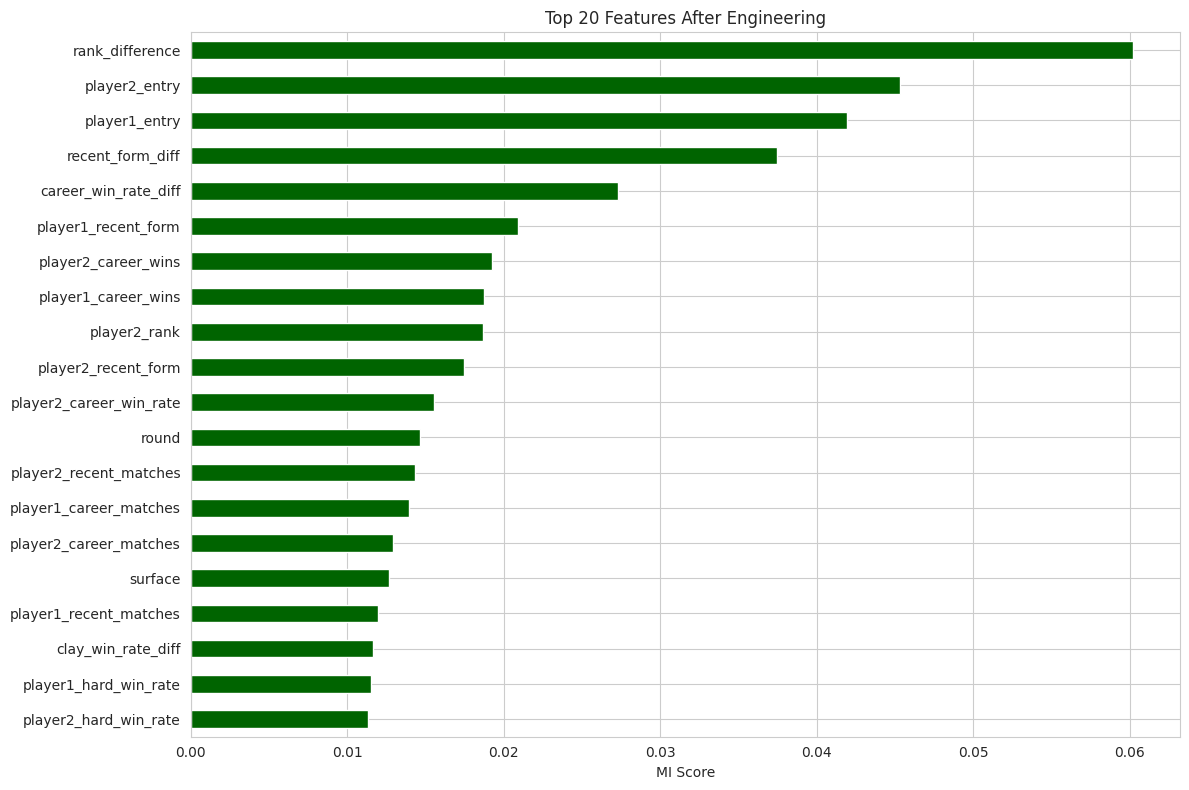

In [14]:
# Cell: Mutual Information on Engineered Features
from sklearn.feature_selection import mutual_info_classif

# Load the feature-engineered data (should be in memory already)
# If not: df = pd.read_csv('../data/processed/matches_with_engineered_features.csv')

# Drop IDs and names
X = df.drop(['player1_won', 'player1_id', 'player2_id', 
             'player1_name', 'player2_name', 'tourney_date'], 
            axis=1, errors='ignore')
y = df['player1_won']

print(f"Total features after engineering: {X.shape[1]}")

# Sample for speed
sample = X.sample(20000, random_state=42)
y_sample = y.loc[sample.index]

print("Computing MI on engineered features...")

# Calculate MI
mi_scores = mutual_info_classif(sample, y_sample, random_state=42, n_jobs=-1)
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

print("\nTOP 30 ENGINEERED FEATURES BY MI:")
print("="*60)
print(mi_results.head(30))

# Aggregate one-hot encoded features
aggregated_mi = {}
for feature, score in mi_results.items():
    if feature.startswith('player1_hand_'):
        base = 'player1_hand'
    elif feature.startswith('player2_hand_'):
        base = 'player2_hand'
    elif feature.startswith('player1_entry_'):
        base = 'player1_entry'
    elif feature.startswith('player2_entry_'):
        base = 'player2_entry'
    elif feature.startswith('surface_'):
        base = 'surface'
    elif feature.startswith('tourney_level_'):
        base = 'tourney_level'
    elif feature.startswith('round_'):
        base = 'round'
    else:
        base = feature
    
    if base not in aggregated_mi:
        aggregated_mi[base] = 0
    aggregated_mi[base] += score

aggregated_mi = pd.Series(aggregated_mi).sort_values(ascending=False)

print("\nAGGREGATED MI (After Feature Engineering):")
print("="*60)
print(aggregated_mi.head(20))

# Plot comparison of top features
plt.figure(figsize=(12, 8))
aggregated_mi.head(20).plot(kind='barh', color='darkgreen')
plt.xlabel('MI Score')
plt.title('Top 20 Features After Engineering')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# Trying to understand the miniscule increase in test 1-3% accuracy

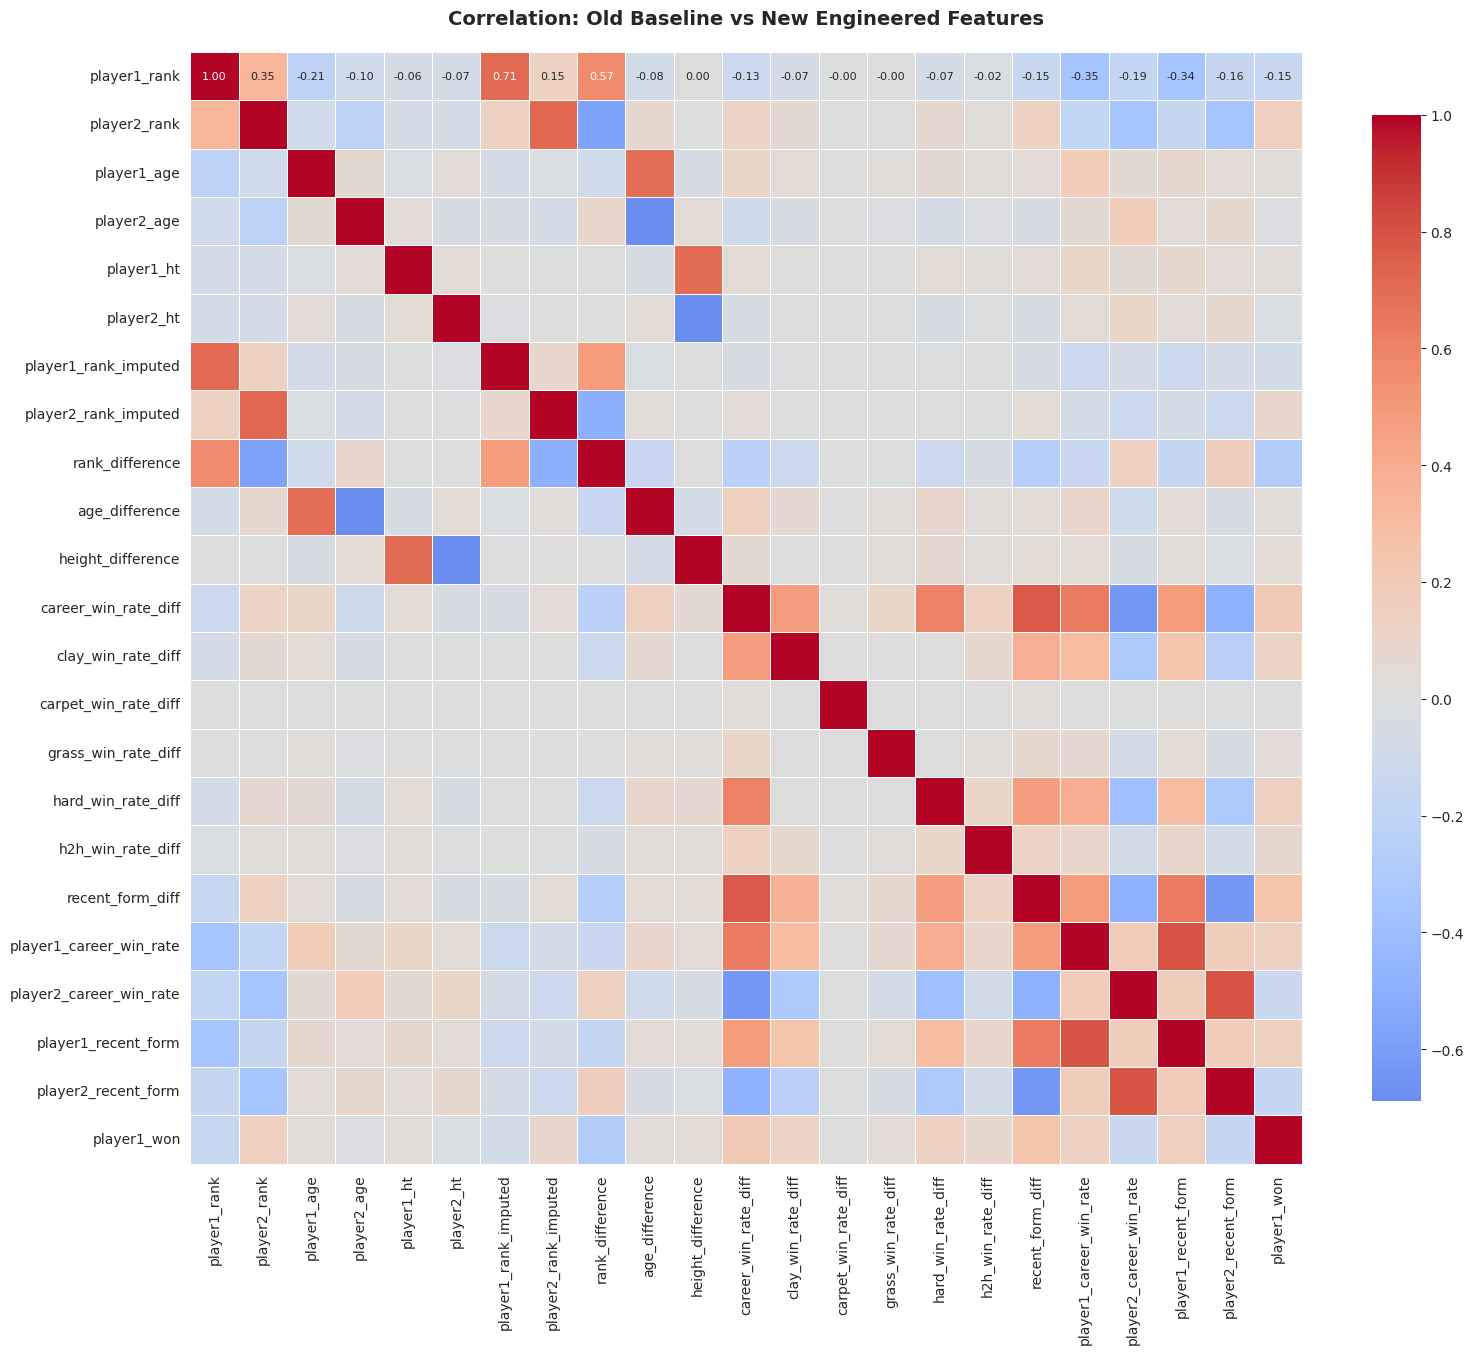

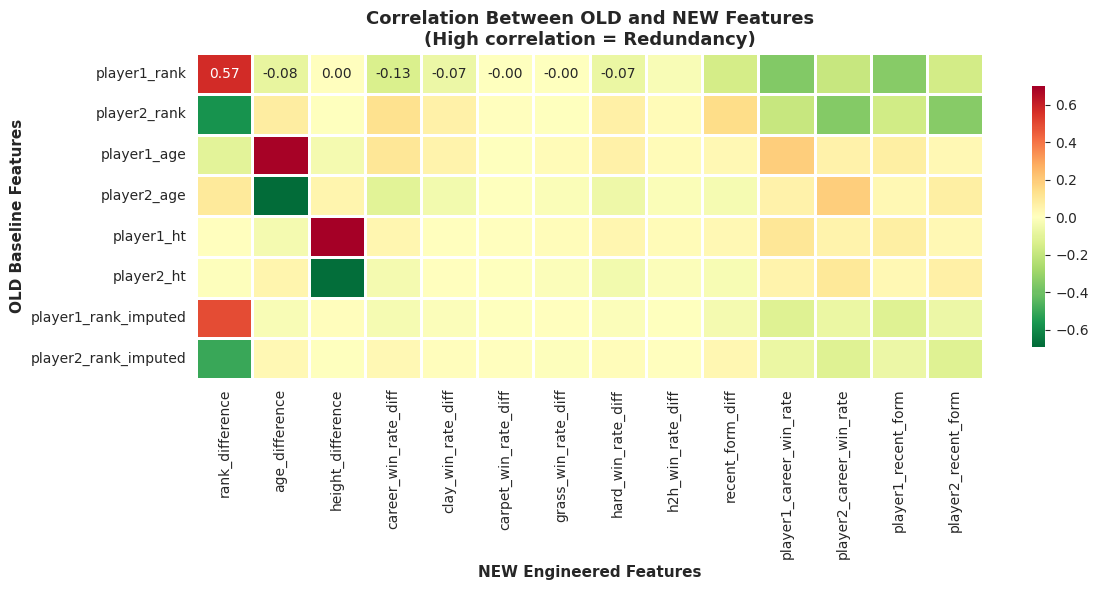


HIGHLY CORRELATED FEATURES (>0.7) - REDUNDANCY DETECTED
player1_ht                ↔ height_difference             : +0.701

CORRELATION WITH TARGET (player1_won)

OLD Features:
  player1_rank                  : -0.1535
  player2_rank                  : +0.1588
  player1_age                   : +0.0188
  player2_age                   : -0.0222
  player1_ht                    : +0.0264
  player2_ht                    : -0.0258
  player1_rank_imputed          : -0.0813
  player2_rank_imputed          : +0.0859

NEW Features:
  rank_difference               : -0.2730
  age_difference                : +0.0298
  height_difference             : +0.0378
  career_win_rate_diff          : +0.2164
  clay_win_rate_diff            : +0.1183
  carpet_win_rate_diff          : +0.0091
  grass_win_rate_diff           : +0.0342
  hard_win_rate_diff            : +0.1490
  h2h_win_rate_diff             : +0.0825
  recent_form_diff              : +0.2441
  player1_career_win_rate       : +0.1372
  player2

In [17]:
# Correlation Analysis: Baseline vs Engineered Features
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# OLD baseline features (numerical only)
old_features = [
    'player1_rank',
    'player2_rank',
    'player1_age',
    'player2_age',
    'player1_ht',
    'player2_ht',
    'player1_rank_imputed',
    'player2_rank_imputed'
]

# NEW engineered features
new_features = [
    'rank_difference',
    'age_difference',
    'height_difference',
    'career_win_rate_diff',
    'clay_win_rate_diff',
    'carpet_win_rate_diff',
    'grass_win_rate_diff',
    'hard_win_rate_diff',
    'h2h_win_rate_diff',
    'recent_form_diff',
    'player1_career_win_rate',
    'player2_career_win_rate',
    'player1_recent_form',
    'player2_recent_form'
]

all_features = old_features + new_features + ['player1_won']

# Calculate correlation
corr = df[all_features].corr()

# Full heatmap
plt.figure(figsize=(16, 14))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8},
            annot_kws={"size": 8})
plt.title('Correlation: Old Baseline vs New Engineered Features', 
          fontsize=14, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

# Extract correlation between OLD and NEW features
old_vs_new_corr = corr.loc[old_features, new_features]

# Heatmap: OLD vs NEW only (cleaner view)
plt.figure(figsize=(12, 6))
sns.heatmap(old_vs_new_corr, annot=True, fmt='.2f', cmap='RdYlGn_r', center=0,
            linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Between OLD and NEW Features\n(High correlation = Redundancy)', 
          fontsize=13, fontweight='bold')
plt.xlabel('NEW Engineered Features', fontsize=11, fontweight='bold')
plt.ylabel('OLD Baseline Features', fontsize=11, fontweight='bold')
plt.tight_layout()
plt.show()

# Find highly correlated pairs (>0.7 = redundant)
print("\n" + "="*70)
print("HIGHLY CORRELATED FEATURES (>0.7) - REDUNDANCY DETECTED")
print("="*70)
high_corr = []
for old_feat in old_features:
    for new_feat in new_features:
        corr_val = corr.loc[old_feat, new_feat]
        if abs(corr_val) > 0.7:
            high_corr.append((old_feat, new_feat, corr_val))
            print(f"{old_feat:25s} ↔ {new_feat:30s}: {corr_val:+.3f}")

if not high_corr:
    print("No high correlations found (good - features are independent!)")

# Show correlation with TARGET
print("\n" + "="*70)
print("CORRELATION WITH TARGET (player1_won)")
print("="*70)
target_corr = corr['player1_won'].drop('player1_won').sort_values(key=abs, ascending=False)
print("\nOLD Features:")
for feat in old_features:
    print(f"  {feat:30s}: {target_corr[feat]:+.4f}")
print("\nNEW Features:")
for feat in new_features:
    print(f"  {feat:30s}: {target_corr[feat]:+.4f}")

## Save File

In [16]:
df_model_ready.to_csv('../data/processed/matches_with_engineered_features.csv', index=False)